# Итоговая работа.

In [79]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
import sympy as sym

%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [83]:
x = x = sym.Symbol('x')
y = sym.tan(sym.sin(x) + sym.cos(2*x + 3))**2
d = sym.diff(y, x)
d

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [84]:
d.evalf(subs={x: 1})

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

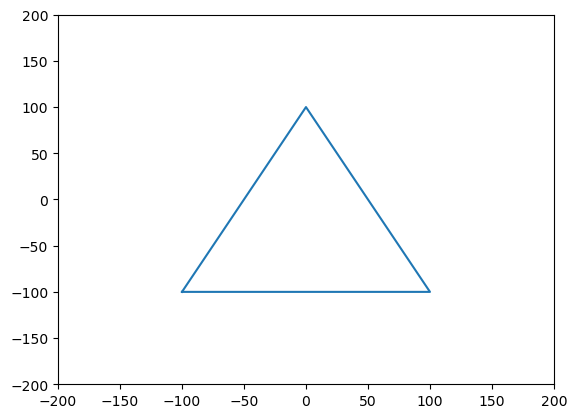

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


array([[150., 180.,   1.],
       [200., 420.,   1.],
       [250., 180.,   1.],
       [150., 180.,   1.]])

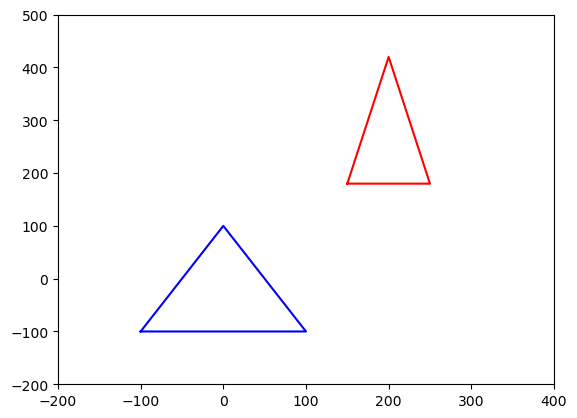

In [17]:
M1 = np.diag([0.5, 1.2, 1])
M2 = np.array([[1, 0, 200],
               [0, 1, 300],
               [0, 0, 1]]).T
A1 = A @ (M1 @ M2)
x1 = A1[:,0]
y1 = A1[:,1]
plt.plot(x, y, 'b')
plt.plot(x1, y1, 'r')
plt.ylim([-200, 500])
plt.xlim([-200, 400])
A1 


## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [18]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [22]:
res = np.linalg.eig(m)
print('Собственные значения матрицы', res[0])
print('Собственныt векторs матрицы:\n', res[1])

Собственные значения матрицы [ 3. -1.]
Собственныt векторs матрицы:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [26]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [23]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

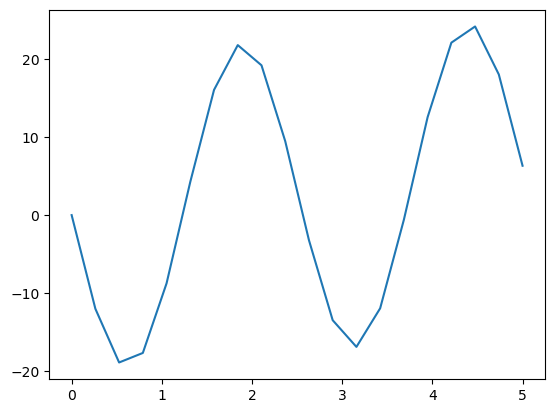

In [24]:
plt.plot(x, fx)
plt.show()

In [37]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

1.5698780089223874e-06 [ 3.  -2.5]


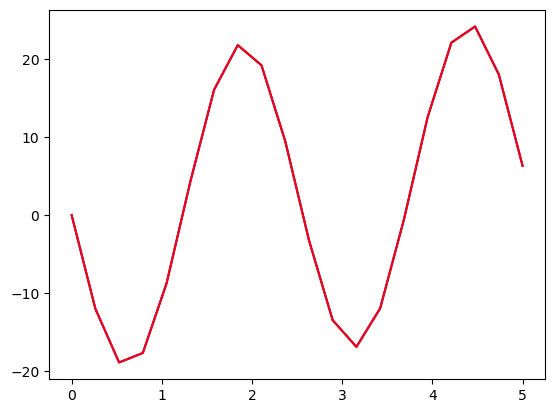

In [52]:
min_err = np.inf
optimal = []
for a in np.arange(-5, 6):
    for b in np.arange(-5, 6):
        res = minimize(error,
                    (a, b),
                    method='nelder-mead',
                    options={
                        'disp': False,
                        'xatol':1e-8}
                    )
        err = error(res.x)
        if err < min_err:
            optimal = res.x
            min_err = err
print(min_err, optimal)
plt.plot(x, fx, 'b')
plt.plot(x, f(x, *optimal), 'r')

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [63]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [76]:
like = []
for i, x in enumerate(raitings):
    candidate_j = 0
    max_cos = -2
    for j, y in enumerate(raitings):
        if i == j:
            continue
        cos_xy = x @ y / (np.linalg.norm(x) * np.linalg.norm(y))
        if max_cos < cos_xy:
            max_cos = cos_xy
            candidate_j = j
    like.append([i, candidate_j])
like

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 9],
 [4, 8],
 [5, 9],
 [6, 3],
 [7, 5],
 [8, 0],
 [9, 2]]